In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [27]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import AgglomerativeClustering
from nltk.corpus import stopwords
import pandas as pd, seaborn as sns, matplotlib as mpl
import sbrt_ibict_ml.sbrt_ibict_ml as sbrt
import matplotlib.pyplot as plt
import numpy as np

In [22]:
# mpl.style.use('seaborn')

In [4]:
dossies = sbrt.get_dossies_df()
corpus = dossies.text
dossies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   file    464 non-null    object
 1   text    464 non-null    object
dtypes: object(2)
memory usage: 7.4+ KB


In [23]:
vectorizer = TfidfVectorizer(stop_words=stopwords.words('portuguese'))
X = vectorizer.fit_transform(corpus)
X.shape

(464, 120747)

In [24]:
n_clusters = 464
Z = linkage(pd.DataFrame(data=X.toarray()), 'complete')
dossies['cluster_label'] = fcluster(Z, n_clusters, criterion='maxclust')
Z

array([[6.60000000e+01, 4.28000000e+02, 0.00000000e+00, 2.00000000e+00],
       [3.06000000e+02, 3.20000000e+02, 1.63031384e-02, 2.00000000e+00],
       [3.50000000e+01, 2.36000000e+02, 1.83322467e-02, 2.00000000e+00],
       ...,
       [9.19000000e+02, 9.21000000e+02, 1.40828415e+00, 2.27000000e+02],
       [4.91000000e+02, 9.23000000e+02, 1.40882688e+00, 2.37000000e+02],
       [9.24000000e+02, 9.25000000e+02, 1.41011663e+00, 4.64000000e+02]])

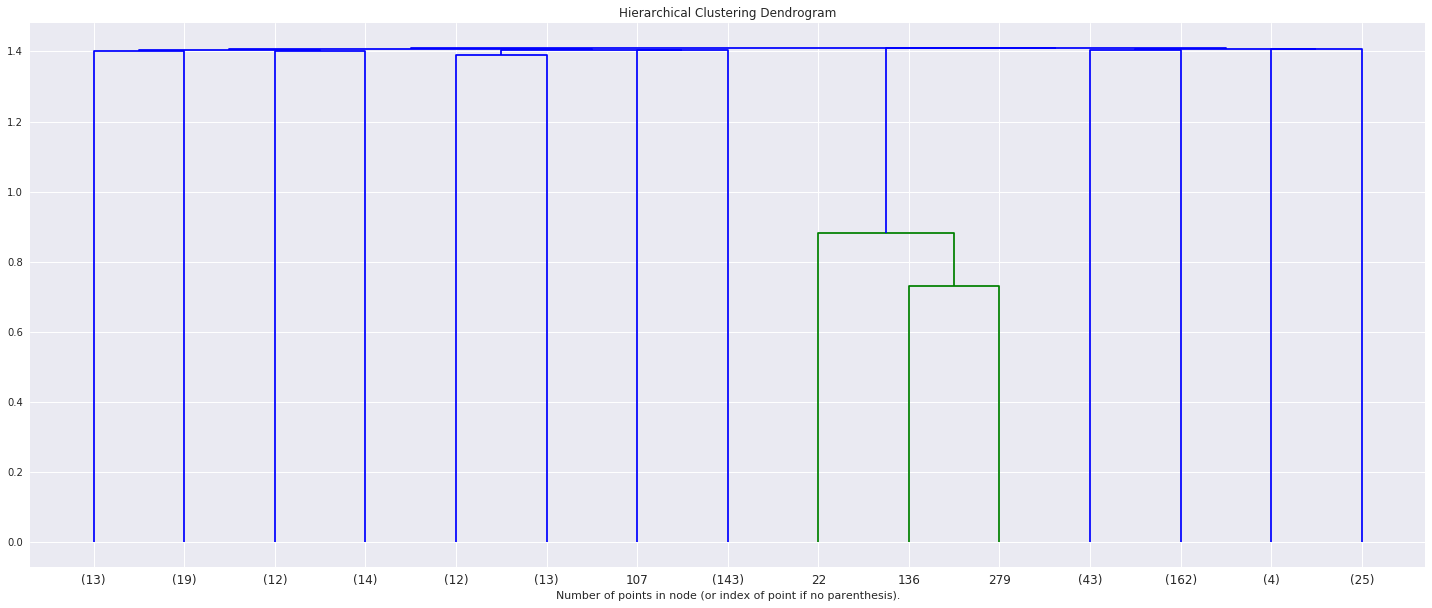

In [25]:
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z, truncate_mode='level', p=3, leaf_rotation=0)
plt.autoscale()
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

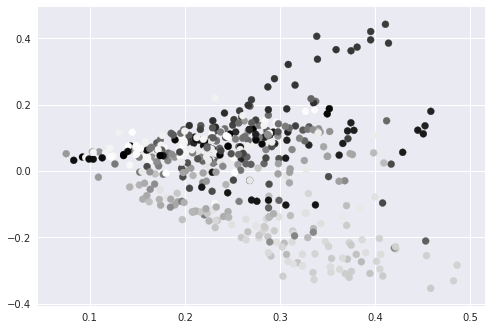

In [28]:
svd = TruncatedSVD()
scatter_plot_points = svd.fit_transform(X.toarray())

dossies['xs'] = [o[0] for o in scatter_plot_points]
dossies['ys'] = [o[1] for o in scatter_plot_points]

plt.scatter(x=xs, y=ys, c=dossies.cluster_label)



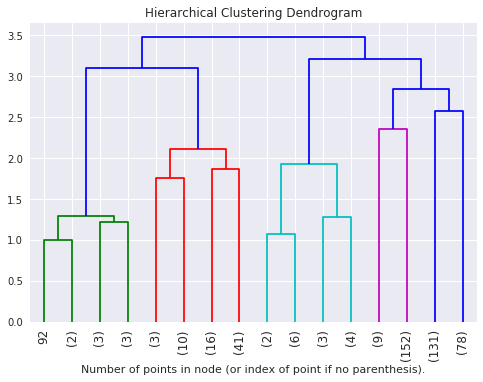

In [29]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model.fit(X.toarray())
sbrt.plot_dendrogram(model, truncate_mode='level', p=3, leaf_rotation=90)
plt.show()

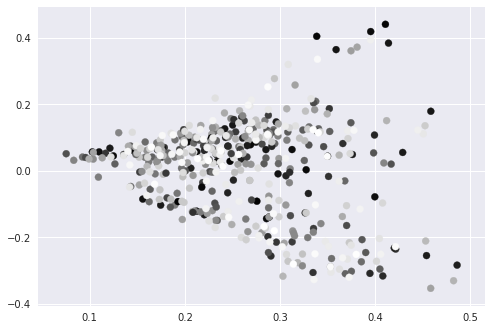

In [30]:
scatter_plot_points = svd.fit_transform(X.toarray())

xs = [o[0] for o in scatter_plot_points]
ys = [o[1] for o in scatter_plot_points]
fig, ax = plt.subplots()

# ax.set_title(f'Clustering with {k} clusters')
plt.scatter(x=xs, y=ys, c=model.labels_)
# ax.scatter(xs, ys, c=model.labels_, alpha=.7)